In [50]:
import pandas as pd
import numpy as np

#read data 
df=pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Poso4KSA.csv')
df.tail()



ksa   B1   B2   B3   B4    B5    B6    B7      NDVI       EVI      NDBI  \
518    3  154  283  617  581  2210  1024   557  0.583662  1.139320 -0.366729   
519    3  443  551  906  994  3152  2750  1497  0.520502  1.082355 -0.068113   
520    3  249  342  691  684  2790  1490   719  0.606218  1.215935 -0.303738   
521    3  327  371  678  598  3376  2152  1028  0.699044  1.660490 -0.221418   
522    3  338  398  695  624  3544  2152  1041  0.700576  1.696097 -0.244382   

        MNDWI      RGVI      GRVI     WDRVI  
518 -0.248020  0.769713  0.030050 -0.448878  
519 -0.504376  0.760943 -0.046316 -0.518485  
520 -0.366346  0.775817  0.005091 -0.420561  
521 -0.520848  0.799080  0.062696 -0.278324  
522 -0.511767  0.801689  0.053829 -0.275552

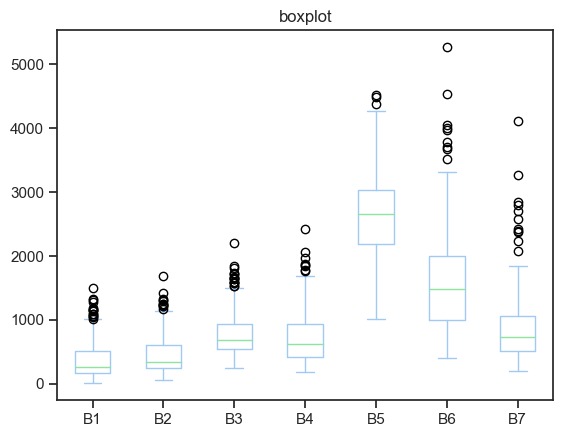

In [51]:
from matplotlib import pyplot as plt 
# Plot the dataframe
ax = df[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7']].plot(kind='box', title='boxplot')
#col='red','yellow','blue', 'green', 'pink','white', 'brown',
#df.boxplot (x='B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', y='ksa')

# Display the plot
plt.show()

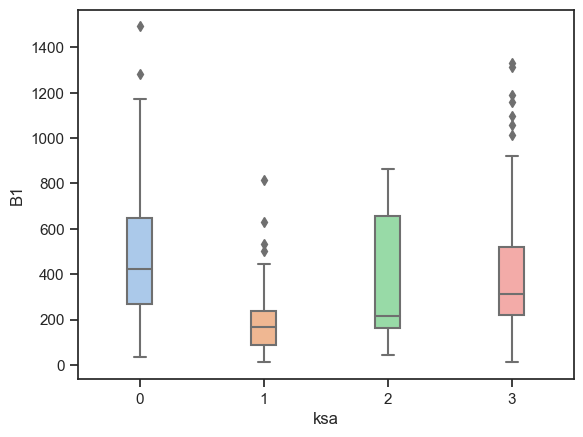

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df["ksa"], y=df["B1"],  width=0.2)

plt.show()

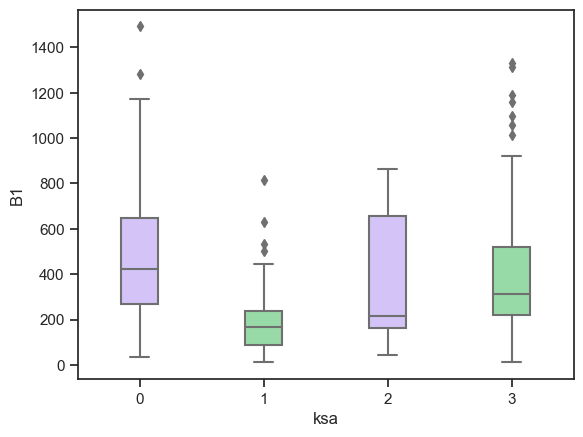

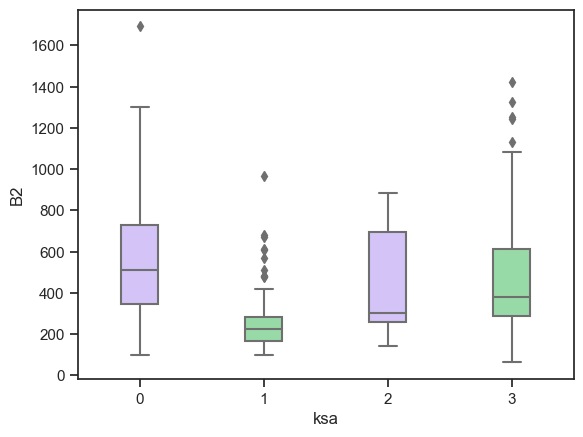

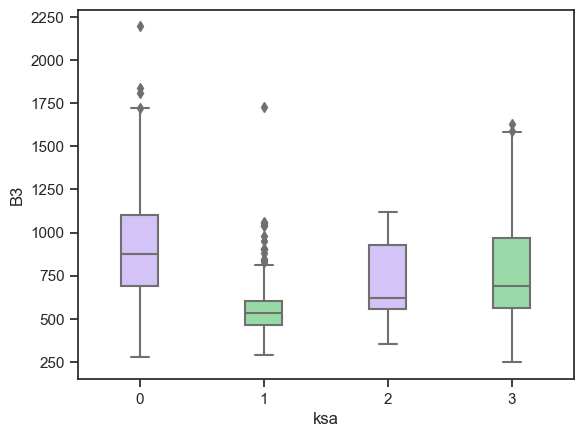

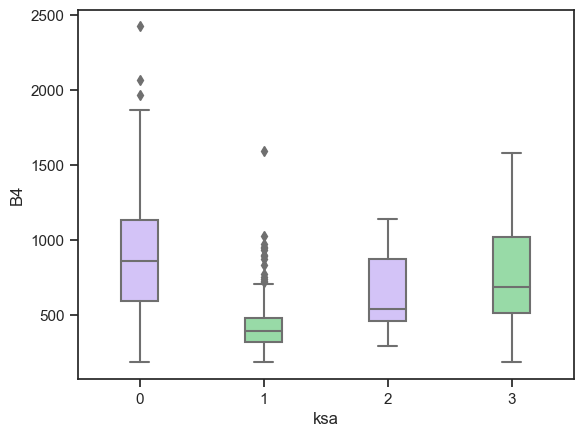

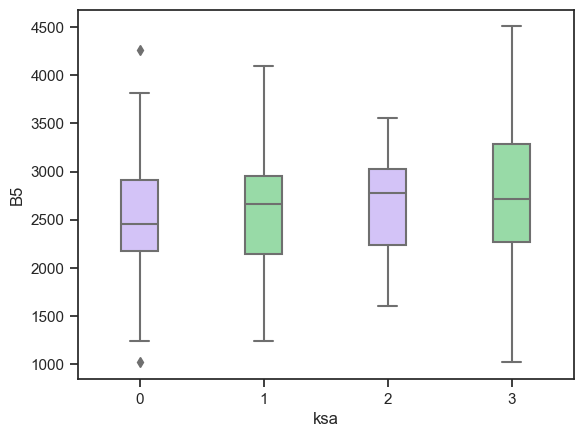

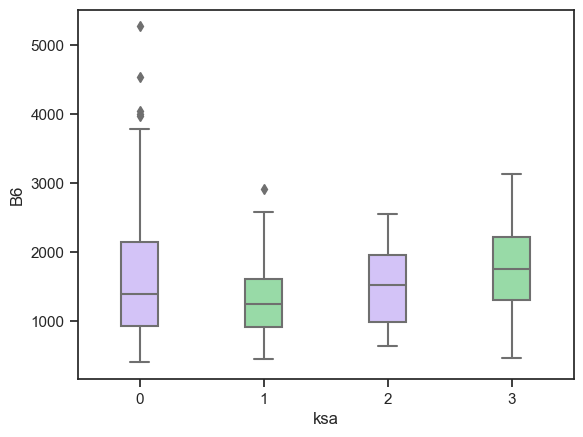

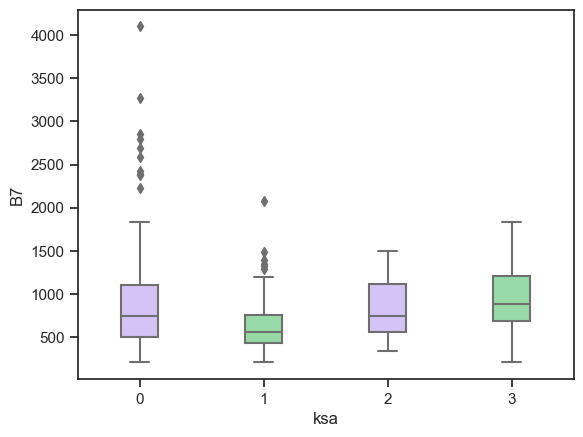

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['B1','B2', 'B3', 'B4', 'B5', 'B6', 'B7']

for i in columns:
    sns.set(style = "ticks", palette = "pastel")

    box_plot = sns.boxplot(x="ksa", y=i,
                          palette=["m","g"],
                          width=0.3,
                          data=df)
    plt.show()

In [54]:
#membagi data into data input and data output (prediction)
X = df.drop('ksa',axis=1)
y = df['ksa']

Create data train and data test

In [55]:
#datatrain
Xx = X.iloc[:488]
yy = y.iloc[:488]
print(Xx)
print(yy)

#datatest
Xprediksi = X.iloc[488:]
yprediksi = y.iloc[488:]
print(Xprediksi)
print(yprediksi)

      B1   B2   B3    B4    B5    B6   B7      NDVI       EVI      NDBI  \
0    241  347  711   766  2638   921  422  0.549941  1.010254 -0.482439   
1    129  217  580   513  2322   914  439  0.638095  1.198489 -0.435105   
2     49  120  385   288  1963   715  324  0.744114  1.499821 -0.466019   
3     41  136  474   413  1810   648  306  0.628430  1.068370 -0.472742   
4     35  123  445   368  1810   622  296  0.662075  1.164218 -0.488487   
..   ...  ...  ...   ...   ...   ...  ...       ...       ...       ...   
483  209  263  517   407  2649  1333  617  0.733639  1.796762 -0.330487   
484  218  268  560   430  2968  1380  623  0.746910  1.792879 -0.365225   
485  102  156  490   310  3029  1242  608  0.814316  1.827285 -0.418403   
486  105  178  525   368  3378  1507  679  0.803524  1.769755 -0.383009   
487  535  632  932  1097  2796  2129  963  0.436424  0.915607 -0.135431   

        MNDWI      RGVI      GRVI     WDRVI  
0   -0.128676  0.751176 -0.037238 -0.487668  
1   -0.

Define k-fold cross validation.
Here I will use k=5

In [56]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [57]:
Path = r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.'
fold_no = 1
for train_index, test_index in cv.split(Xx, yy):
    print("FOLD ",fold_no)
    print("TRAIN:", train_index)
    print("TEST:", test_index)  

    X_train = Xx.iloc[train_index, :]
    X_test = Xx.iloc[test_index, :]
    y_train = yy[train_index]
    y_test = yy[test_index]

    X_train.to_csv(Path + 'Xtrain' + str(fold_no) + '.csv',index=False)
    X_test.to_csv(Path + 'Xtest' + str(fold_no) + '.csv',index=False)
    y_train.to_csv(Path + 'Ytrain' + str(fold_no) + '.csv',index=False)
    y_test.to_csv(Path + 'Ytest' + str(fold_no) + '.csv',index=False)

    fold_no += 1

FOLD  1
TRAIN: [  1   2   4   5   6   7   9  10  11  13  14  15  16  17  18  20  21  22
  23  24  25  26  27  28  30  33  34  36  38  39  41  42  43  44  46  48
  49  50  51  52  54  56  57  58  59  60  61  63  64  65  67  68  69  71
  72  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  90  91
  92  95  96  97  98  99 100 101 104 105 106 107 108 109 110 112 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 133 134
 136 137 139 140 142 143 144 147 148 149 150 152 153 154 155 156 157 159
 160 161 162 163 164 165 167 169 170 171 172 173 174 176 177 178 179 180
 181 182 183 184 185 189 190 191 192 194 195 196 198 199 200 201 204 205
 206 207 208 209 210 211 212 213 214 215 217 218 221 223 224 225 226 227
 228 229 232 234 236 237 238 240 241 242 243 244 245 246 247 249 251 252
 253 255 257 258 259 260 261 262 264 266 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 284 285 286 287 288 289 290 293 294 295 296
 297 298 300 301 303 304 305 306 307

In [58]:
#Data StratifiedKfold
#Fold1


xtrainfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtrain1.csv')
xtestfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtest1.csv')
ytrainfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytrain1.csv')
ytestfold1 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytest1.csv')

#Fold2
xtrainfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtrain2.csv')
xtestfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtest2.csv')
ytrainfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytrain2.csv')
ytestfold2 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytest2.csv')

#Fold3
xtrainfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtrain3.csv')
xtestfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtest3.csv')
ytrainfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytrain3.csv')
ytestfold3 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytest3.csv')

#Fold4
xtrainfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtrain4.csv')
xtestfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtest4.csv')
ytrainfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytrain4.csv')
ytestfold4 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytest4.csv')

#Fold5
xtrainfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtrain5.csv')
xtestfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Xtest5.csv')
ytrainfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytrain5.csv')
ytestfold5 = pd.read_csv(r'C:\Users\AMINA\Documents\belajar python\kevin\Data10FoldPoso\.Ytest5.csv')




In [59]:
#RobustScaler
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
xtrainfold1 = pd.DataFrame(sc.fit_transform(xtrainfold1))
xtestfold1 = pd.DataFrame(sc.fit_transform(xtestfold1))

xtrainfold2 = pd.DataFrame(sc.fit_transform(xtrainfold2))
xtestfold2 = pd.DataFrame(sc.fit_transform(xtestfold2))

xtrainfold3 = pd.DataFrame(sc.fit_transform(xtrainfold3))
xtestfold3 = pd.DataFrame(sc.fit_transform(xtestfold3))

xtrainfold4 = pd.DataFrame(sc.fit_transform(xtrainfold4))
xtestfold4 = pd.DataFrame(sc.fit_transform(xtestfold4))

xtrainfold5 = pd.DataFrame(sc.fit_transform(xtrainfold5))
xtestfold5 = pd.DataFrame(sc.fit_transform(xtestfold5))



In [60]:
y_tr1 = ytrainfold1["ksa"].astype("category")
y_tr2 = ytrainfold2["ksa"].astype("category")
y_tr3 = ytrainfold3["ksa"].astype("category")
y_tr4 = ytrainfold4["ksa"].astype("category")
y_tr5 = ytrainfold5["ksa"].astype("category")

y_ts1  = ytestfold1["ksa"].astype("category")
y_ts2  = ytestfold2["ksa"].astype("category")
y_ts3  = ytestfold3["ksa"].astype("category")
y_ts4  = ytestfold4["ksa"].astype("category")
y_ts5  = ytestfold5["ksa"].astype("category")

Implement Neural Network
1. import
2. set optimizer
3. define keras model
4. compile keras model
5. tuning hyperparameter in Fold 1, after get the best parameter. visualize in graph. then implement best param in 
6. create new keras model with best param

--repeat until iter-4. count from 0

In [61]:
#pip install -U colorama

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)


In [63]:
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)
from sklearn.model_selection import cross_val_score
# Create function
def nn_cl_bo2(neurons, activation, optimizer, learning_rate, batch_size, epochs, layers1, layers2, normalization, dropout, dropout_rate):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', 'LeakyReLU','relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    batch_size = round(batch_size)
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    def nn_cl_fun():
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=14, activation=activation))
        if normalization > 0.5:
            nn.add(BatchNormalization())
        for i in range(layers1):
            nn.add(Dense(neurons, activation=activation))
        if dropout > 0.5:
            nn.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, xtrainfold1, y_tr1, scoring=score_acc, fit_params={'callbacks':[es]}).mean()
    return score

In [68]:
params_nn2 ={
    'neurons': (10, 100),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.01, 1),
    'batch_size':(200, 1000),
    'epochs':(20, 100),
    'layers1':(1,3),
    'layers2':(1,3),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0,0.3)
}

In [69]:
nn_bo = BayesianOptimization(nn_cl_bo2, params_nn2, random_state=111)
nn_bo.maximize(init_points=25, n_iter=4)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------
3/3 [==============================] - 0s 2ms/step
| 1         | 0.2821    | 5.51      | 335.3     | 0.4361    | 0.2308    | 43.63     | 1.298     | 1.045     | 0.426     | 31.48     | 0.3377    | 6.935     |
3/3 [==============================] - 0s 2ms/step
| 2         | 0.2821    | 2.14      | 265.0     | 0.6696    | 0.1864    | 41.94     | 1.932     | 1.237     | 0.08322   | 91.07     | 0.794     | 5.884     |
3/3 [==============================] - 0s 1ms/step
| 3         | 0.3077    | 7.337     | 992.8     | 0.5773    | 0.2441    | 53.71     | 1.055     | 1.908     | 0.1143    | 83.55     | 0.6977    | 3.957     |
3/3 [==============================] - 0s 19ms/step
| 4  

In [71]:
params_nn_ = nn_bo.max['params']
learning_rate = params_nn_['learning_rate']
activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu','elu', 'exponential', 'LeakyReLU','relu']
params_nn_['activation'] = activationL[round(params_nn_['activation'])]
params_nn_['batch_size'] = round(params_nn_['batch_size'])
params_nn_['epochs'] = round(params_nn_['epochs'])
params_nn_['layers1'] = round(params_nn_['layers1'])
params_nn_['layers2'] = round(params_nn_['layers2'])
params_nn_['neurons'] = round(params_nn_['neurons'])
optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
             'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
             'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
             'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
params_nn_['optimizer'] = optimizerD[optimizerL[round(params_nn_['optimizer'])]]
params_nn_

{'activation': 'tanh',
 'batch_size': 284,
 'dropout': 0.15252534628981973,
 'dropout_rate': 0.08205875143738746,
 'epochs': 83,
 'layers1': 2,
 'layers2': 3,
 'learning_rate': 0.4387372674932637,
 'neurons': 17,
 'normalization': 0.010643257301658493,
 'optimizer': <keras.optimizers.optimizer_v2.adadelta.Adadelta at 0x2751dd99ae0>}

In [72]:
# Fitting Neural Network
def nn_cl_fun():
    nn = Sequential()
    nn.add(Dense(params_nn_['neurons'], input_dim=14, activation=params_nn_['activation']))
    if params_nn_['normalization'] > 0.5:
        nn.add(BatchNormalization())
    for i in range(params_nn_['layers1']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    if params_nn_['dropout'] > 0.5:
        nn.add(Dropout(params_nn_['dropout_rate'], seed=123))
    for i in range(params_nn_['layers2']):
        nn.add(Dense(params_nn_['neurons'], activation=params_nn_['activation']))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=params_nn_['optimizer'], metrics=['accuracy'])
    return nn
es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
nn = KerasClassifier(build_fn=nn_cl_fun, epochs=params_nn_['epochs'], batch_size=params_nn_['batch_size'],verbose=0)

In [73]:
#NN
history = nn.fit(xtrainfold1, y_tr1, validation_data=(xtestfold1, y_ts1), verbose=1)



Epoch 1/83
2/2 [==============================] - 1s 314ms/step - loss: 0.6924 - accuracy: 0.3000 - val_loss: 0.6627 - val_accuracy: 0.2041
Epoch 2/83
2/2 [==============================] - 0s 29ms/step - loss: 0.6435 - accuracy: 0.3051 - val_loss: 0.6187 - val_accuracy: 0.1939
Epoch 3/83
2/2 [==============================] - 0s 29ms/step - loss: 0.5988 - accuracy: 0.2949 - val_loss: 0.5753 - val_accuracy: 0.1939
Epoch 4/83
2/2 [==============================] - 0s 66ms/step - loss: 0.5578 - accuracy: 0.3077 - val_loss: 0.5307 - val_accuracy: 0.2041
Epoch 5/83
2/2 [==============================] - 0s 30ms/step - loss: 0.5149 - accuracy: 0.3179 - val_loss: 0.4814 - val_accuracy: 0.1939
Epoch 6/83
2/2 [==============================] - 0s 28ms/step - loss: 0.4705 - accuracy: 0.3103 - val_loss: 0.4427 - val_accuracy: 0.2041
Epoch 7/83
2/2 [==============================] - 0s 29ms/step - loss: 0.4275 - accuracy: 0.3179 - val_loss: 0.3898 - val_accuracy: 0.2143
Epoch 8/83
2/2 [==========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


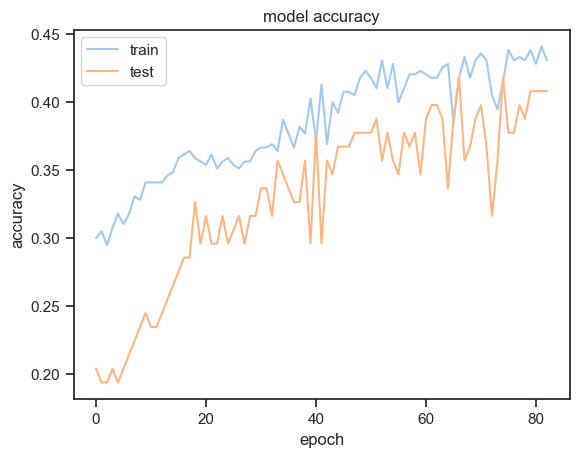

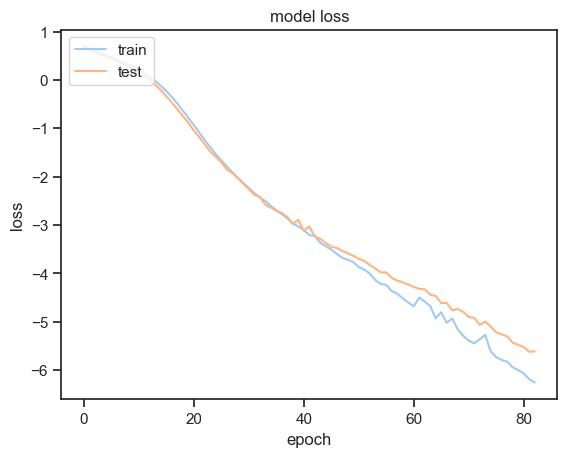

In [74]:
# list all data in history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [75]:
'''
import graphviz
pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(model01, view=True, filename="my_ann_model.gv", title="Model 1 — Simple Architecture")
graph_file = graphviz.Source.from_file("my_ann_model.gv")
graph_file

'''

'\nimport graphviz\npip install ann_visualizer\nfrom ann_visualizer.visualize import ann_viz\nann_viz(model01, view=True, filename="my_ann_model.gv", title="Model 1 — Simple Architecture")\ngraph_file = graphviz.Source.from_file("my_ann_model.gv")\ngraph_file\n\n'